Dataset Shape: (74681, 4)
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


/tmp/ipython-input-1445249734.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


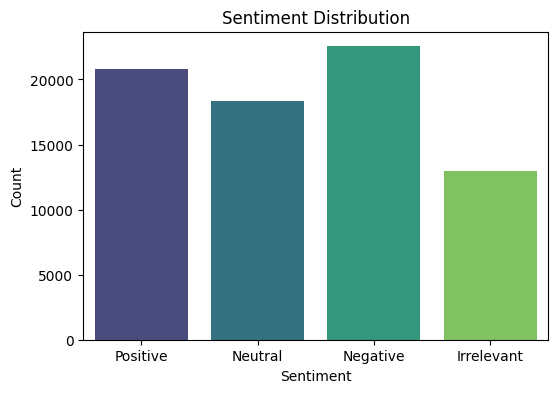


Accuracy: 0.6440382941688425

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.73      0.36      0.48      2661
    Negative       0.62      0.82      0.71      4471
     Neutral       0.66      0.54      0.60      3551
    Positive       0.63      0.73      0.68      4254

    accuracy                           0.64     14937
   macro avg       0.66      0.61      0.62     14937
weighted avg       0.66      0.64      0.63     14937



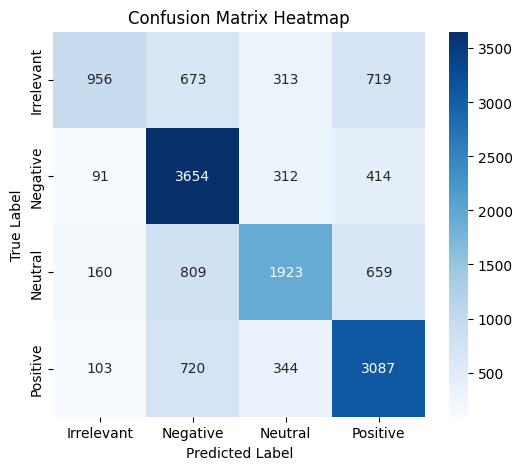


Custom Tweet Prediction: Negative


In [ ]:
# Twitter Sentiment Analysis with Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
df = pd.read_csv("twitter_training.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# --- Dataset format: ID,Entity,Sentiment,Tweet ---
X = df.iloc[:, 3]   # Tweet text
y = df.iloc[:, 2]   # Sentiment

# FIX missing values
X = X.fillna("")

# 2. Sentiment distribution visualization
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 3. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Train model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 9. Custom test
sample_tweet = ["I hate this update, it's the worst ever!"]
sample_vector = tfidf.transform(sample_tweet)
prediction = model.predict(sample_vector)
print("\nCustom Tweet Prediction:", prediction[0])
